In [1]:
import pandas as pd

# Load the data
file_path = r"D:\uni and work\Jadi\Data\09 Classificaation Decision Tree\drug200.csv"
df = pd.read_csv(file_path)

# Look at the first few rows
print(df.head())

# Basic info
print(df.info())

# Summary stats
print(df.describe(include='all'))


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
               Age  Sex    BP Cholesterol     Na_to_K   Drug
count   200.000000  200   200         200  200.000000    200
unique         NaN    2     3           2         NaN      5
top            NaN    M  HIG

In [2]:
print(df.isnull().sum())


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


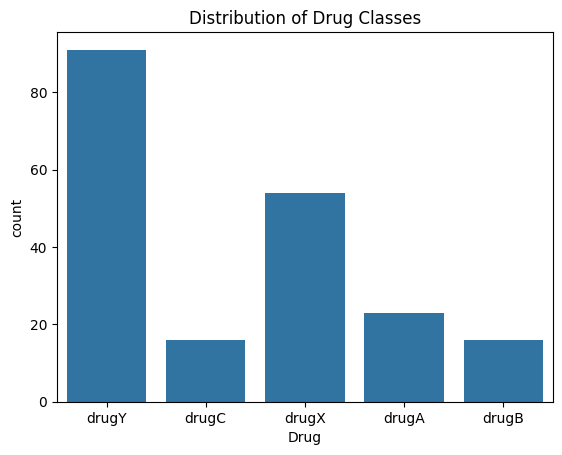

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of target variable
sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drug Classes')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Drug':  # don't encode target yet
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Encode target
le = LabelEncoder()
df_encoded['Drug'] = le.fit_transform(df['Drug'])

# Split
X = df_encoded.drop('Drug', axis=1)
y = df_encoded['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0


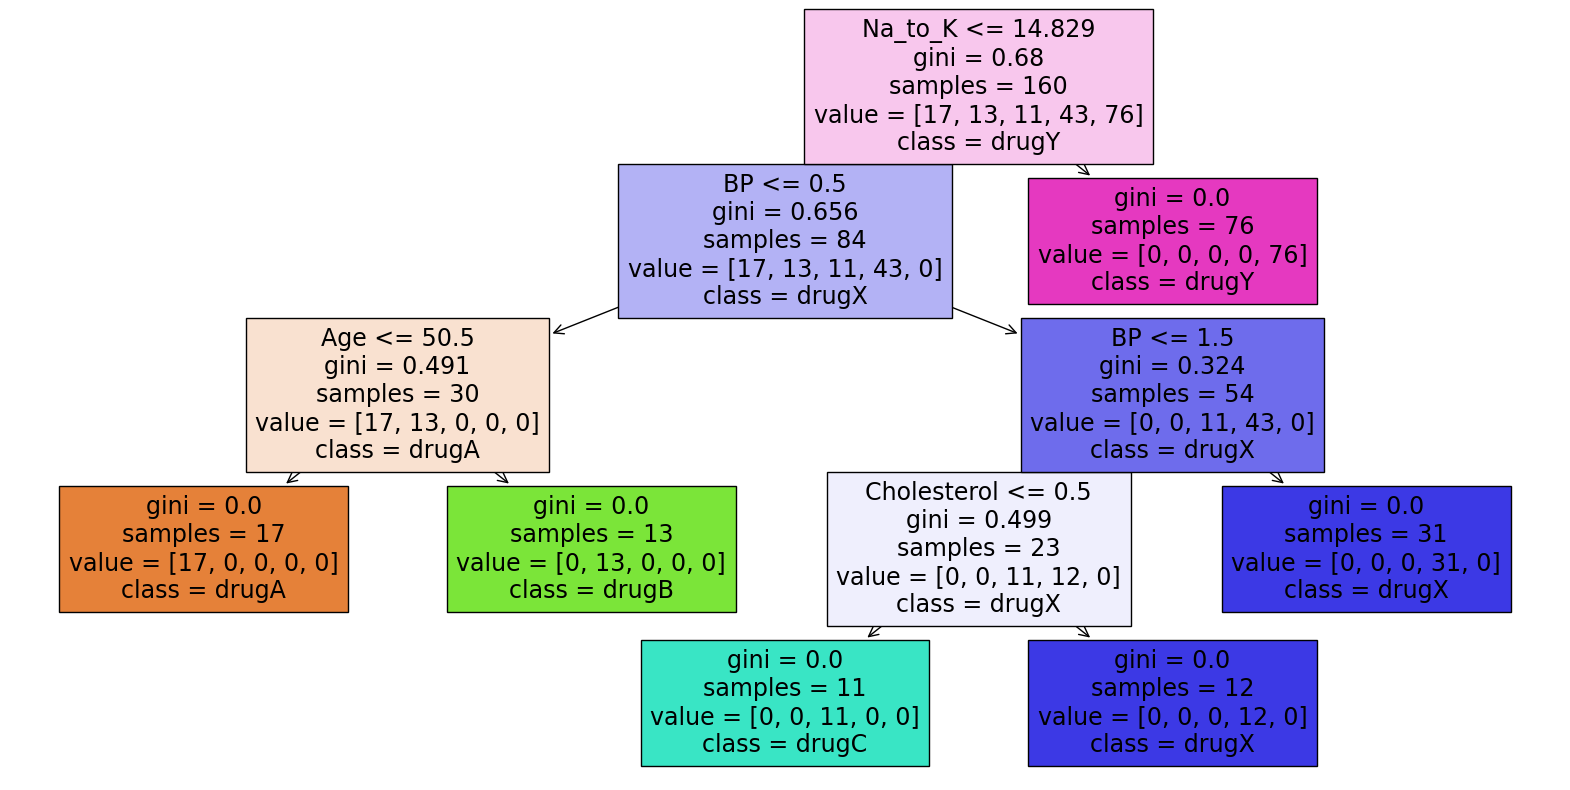

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


In [7]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [1.    1.    1.    0.925 1.   ]
Average CV score: 0.985


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 1.0


In [10]:
# Example: Predict drug class based on user input
def predict_drug():
    print("Enter the following patient info:")
    
    Age = int(input("Age: "))
    Sex = input("Sex (F/M): ")
    BP = input("Blood Pressure (LOW/NORMAL/HIGH): ")
    Cholesterol = input("Cholesterol (NORMAL/HIGH): ")
    Na_to_K = float(input("Na_to_K (e.g., 15.0): "))

    # Encode input the same way you encoded training data
    input_dict = {
        'Age': Age,
        'Sex': 0 if Sex.upper() == 'F' else 1,
        'BP': {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}[BP.upper()],
        'Cholesterol': 0 if Cholesterol.upper() == 'NORMAL' else 1,
        'Na_to_K': Na_to_K
    }

    input_df = pd.DataFrame([input_dict])
    
    # Predict
    prediction = clf.predict(input_df)
    predicted_class = le.inverse_transform(prediction)[0]

    print(f"\n🔮 Predicted Drug: {predicted_class}")

# Call the function
predict_drug()


Enter the following patient info:


ValueError: could not convert string to float: '!%.0'